# The Simplest Topologically Protected System (Probably)

Here is the simplest possible system I can think of that is 

* classical
* 2 band
* has a topologically protected state

It probably can't get much simpler. Consider a system of identical masses $m$ connected by springs of alternating strengths, $k_a$ and $k_b$. Take $x_n$ to be the displacement of the $n$th mass from its equilibrium position. Apply Newton's laws, 

$$F_n = -k_a (x_n - x_{n+1}) - k_b (x_n - x_{n-1}),\ n\ \mathrm{even}$$

$$F_n = -k_b (x_n - x_{n+1}) - k_a (x_n - x_{n-1}),\ n\ \mathrm{odd}$$

Using this and assuming harmonic perturbations $x \propto e^{i\omega t}$, we arrive at the eigenvalue problem 

$$
H \mathbf{x} = \omega^2 \mathbf{x}
$$

$$
H = \begin{bmatrix}
k_0 & -k_b & 0 & \dots & \dots &0 \\
-k_b & k_0 & -k_a & 0 & \dots & \vdots \\
0 & -k_a & k_0 & -k_b & 0 & \vdots\\
\vdots & 0  & \ddots & \ddots & \ddots &\vdots\\
0 & 0 & 0 & -k_b & k_0 & -k_a \\
\end{bmatrix}
$$
with $k_0 = k_a + k_b$ and $m = 1$ for convenience. 


## Numerical Results on Finite length chains
Using this system with boundaries (hard walls), we can take the  two limits, $k_a > k_b$ and $k_a < k_b$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['figure.dpi'] = 300
plt.style.use('prl')
plt.rcParams.update({'font.size': 32})

Define a function to create the hamiltonian

In [2]:
def spring_hamiltonian(N, k1=1, k2=0.5, pbc=False):

    off = np.zeros(N-1)
    off[::2] = k1
    off[1::2] = k2
    H_1d = -(np.diag(-(k1+k2)*np.ones(N)) + np.diag(off,k=1) + np.diag(off,k=-1))

    if pbc:
        H_1d[0,-1] = -1
        H_1d[-1,0] = -1
        
    return H_1d

...and compute the spectrum (and eigenvectors)

In [3]:
def efreq(H):
    evals, evecs = np.linalg.eig(H)
    indx = np.argsort(evals)
    omega = np.sqrt(evals[indx])
    
    return omega, evecs[:,indx]

We now try the two cases along with the trivial ($k_a = k_b$) case,

In [4]:
w0 = spring_hamiltonian(100, k1=1,k2=0.5)
w1 = spring_hamiltonian(100, k1=0.5, k2=1)
wt = spring_hamiltonian(100, k1=1, k2=1)

Looking at a small piece of one of these Hamiltonians, we see clearly the pattern of alternating diagonals characteristic of the SSH system in dimerized molecules.

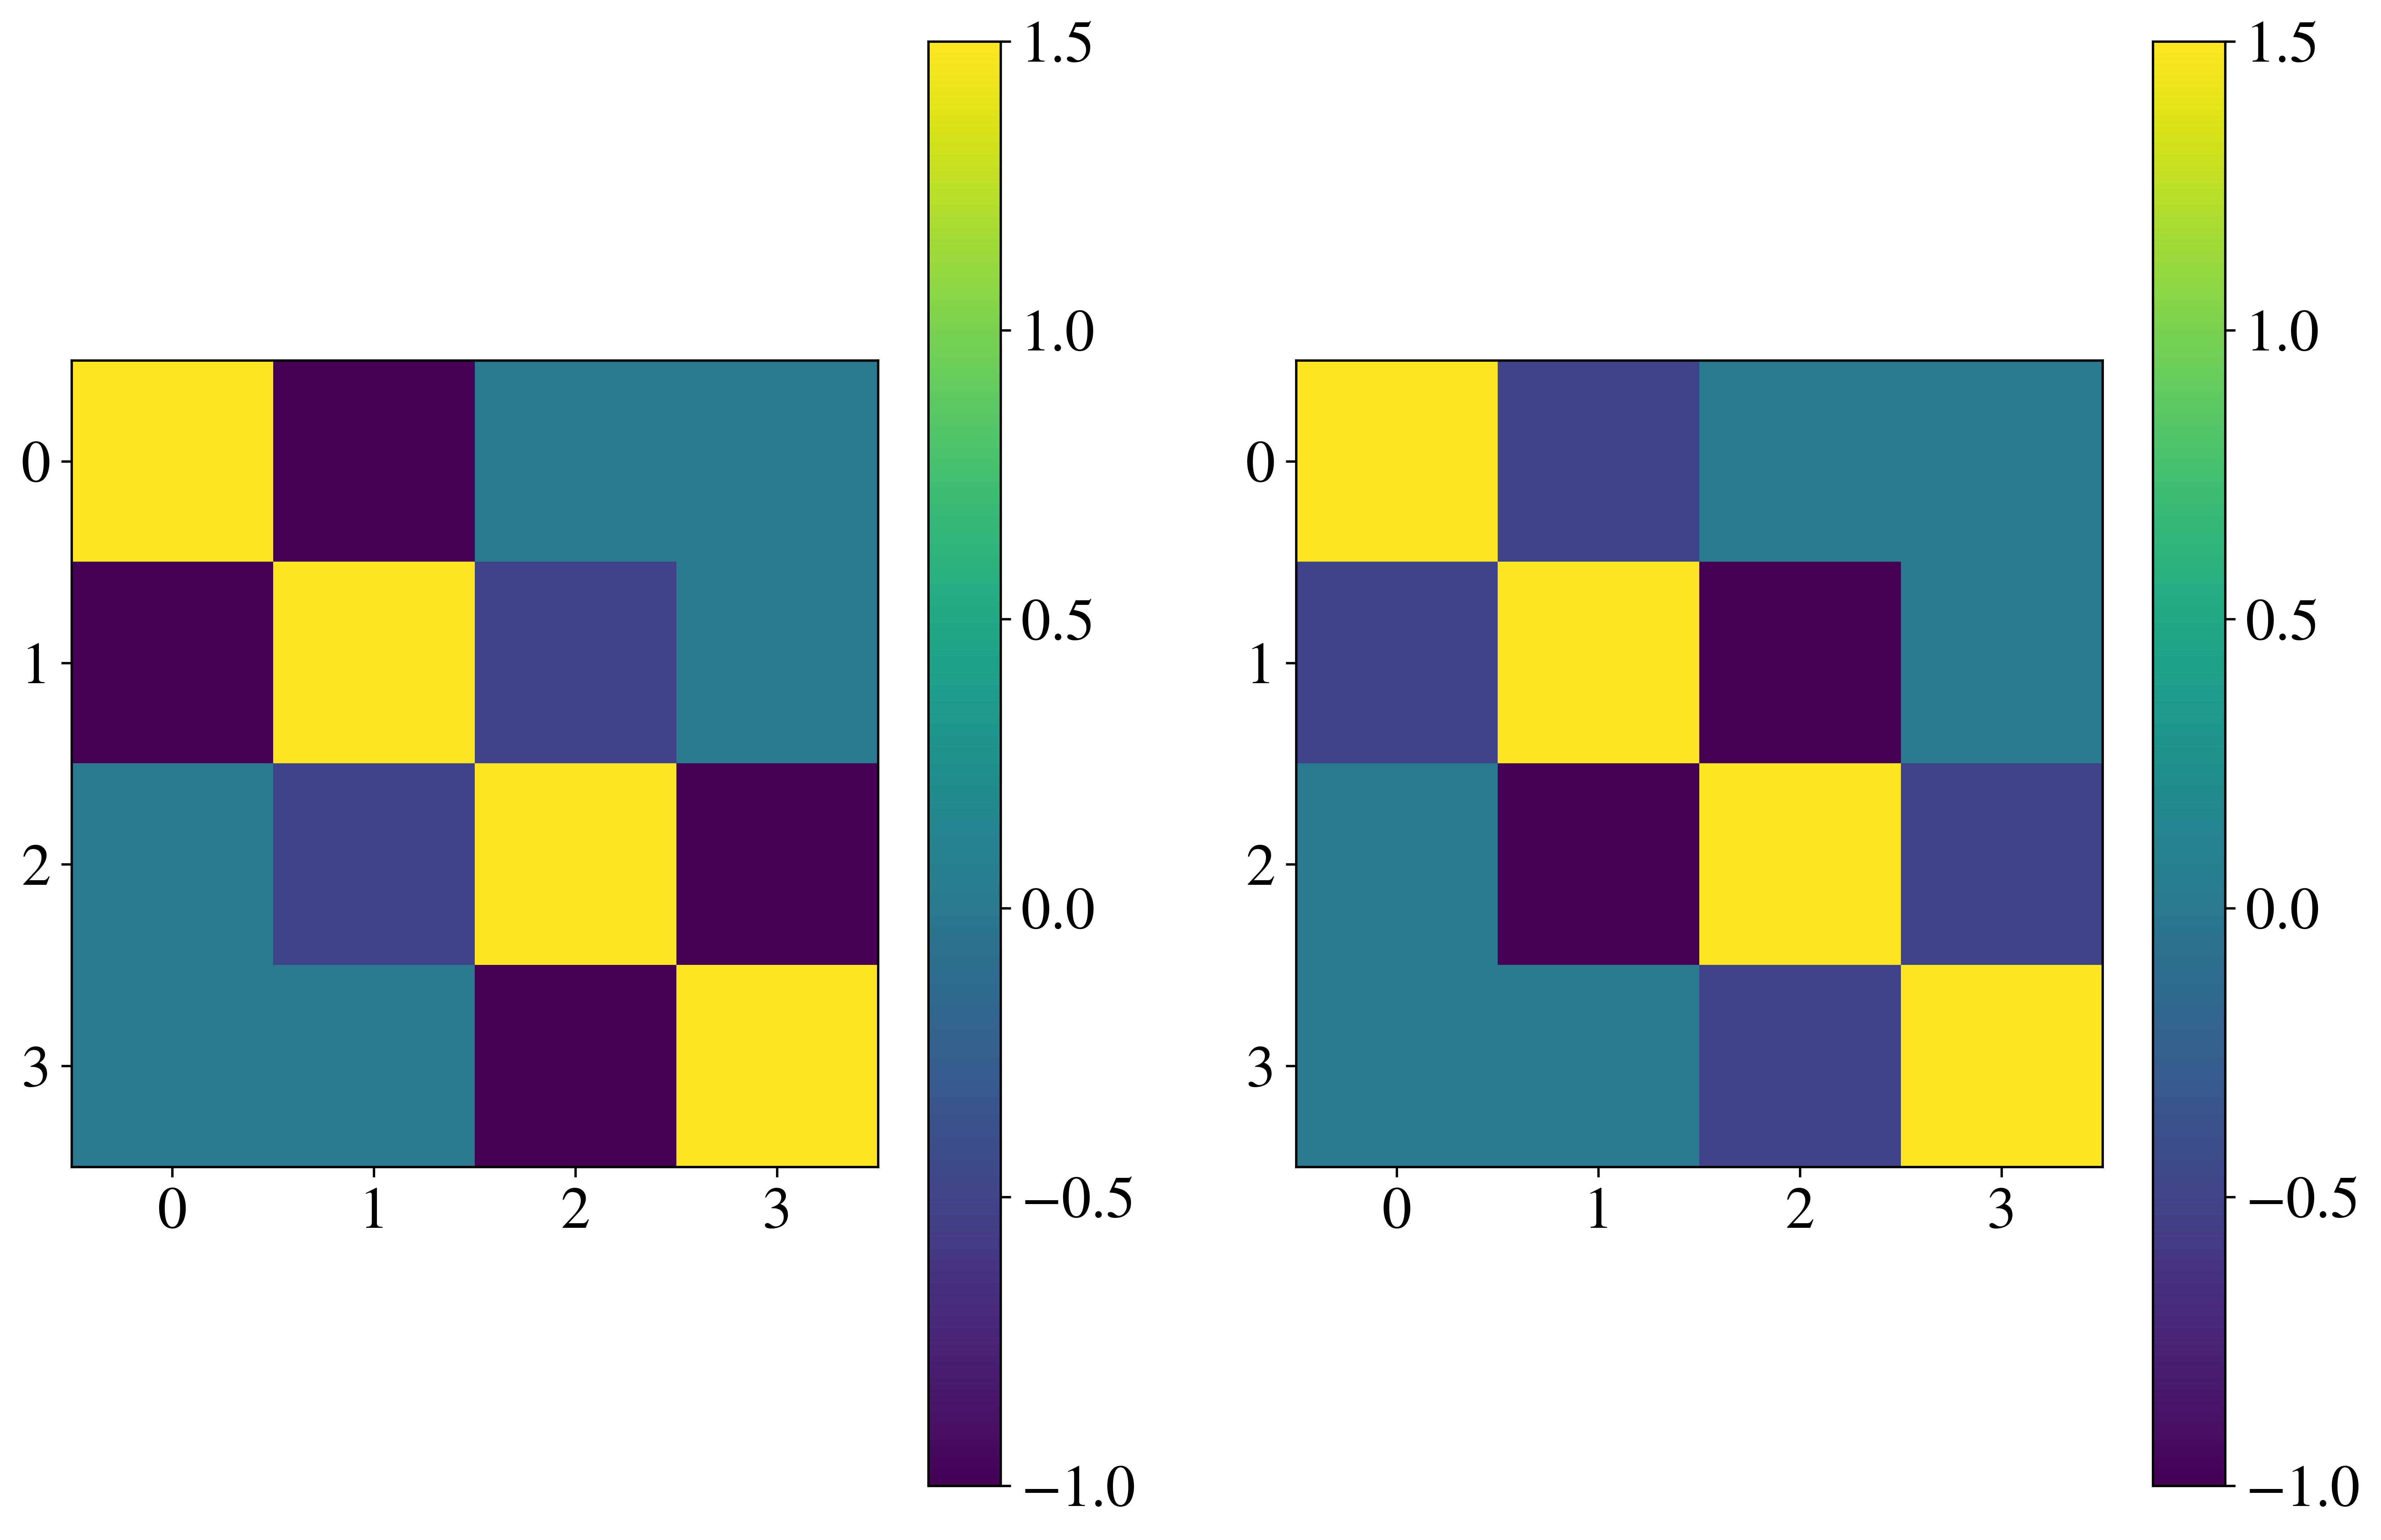

In [5]:
plt.subplot(121)
plt.imshow(w0[:4,0:4])
plt.colorbar()
plt.subplot(122)
plt.imshow(w1[:4,0:4])
plt.colorbar()
plt.tight_layout()

When we plot the spectra for the two cases, we see **modes in the gap** for $k_a < k_b$ but none for $k_b < k_a$!

This the hallmark of topologically protected edge modes.

In [6]:
w0_freq, w0_evecs = efreq(w0)
w1_freq, w1_evecs = efreq(w1)
wt_freq, wt_evecs = efreq(wt)

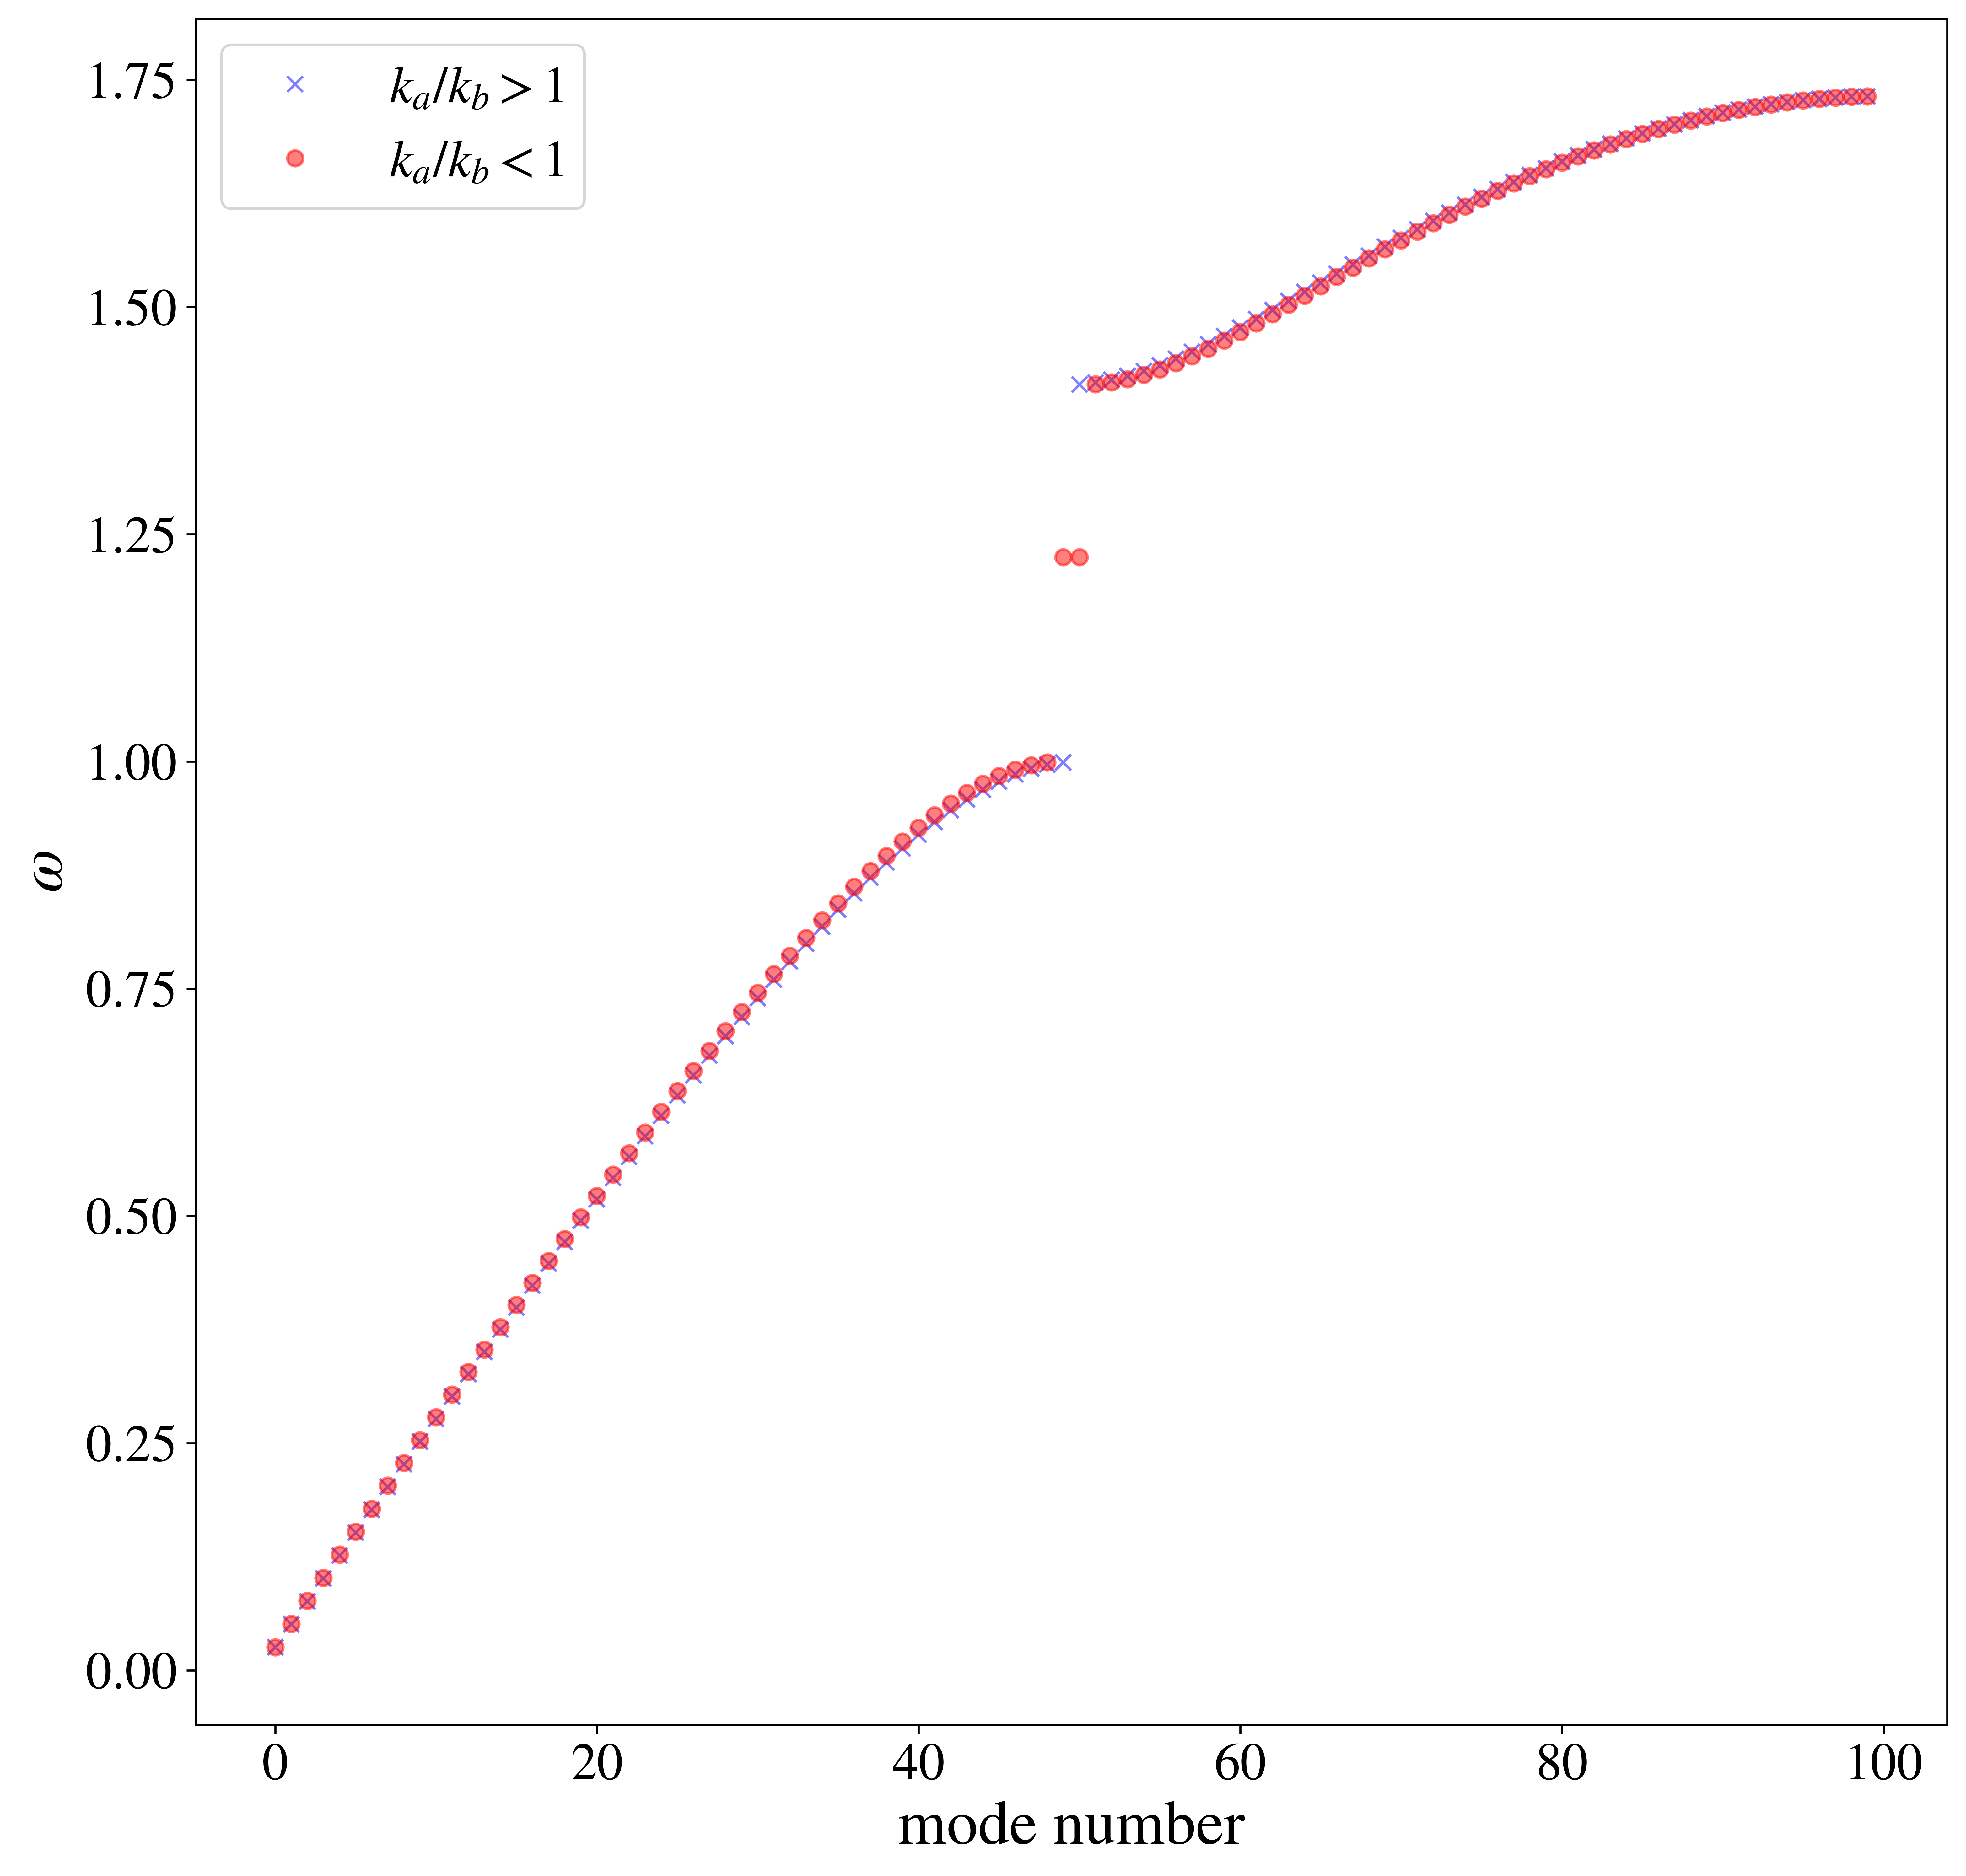

In [7]:
plt.figure(figsize=(12,12))
plt.plot(w0_freq,'bx',alpha=0.5, label=r'$k_a/k_b > 1$')
plt.plot(w1_freq,'ro', alpha=0.5, label=r'$k_a/k_b < 1$')
plt.xlabel("mode number")
plt.ylabel(r"$\omega$")
plt.legend()

In a 1D system, edge modes are zero-dimensional modes localized to the the boundaries. 

For both cases, we plot the middle two modes, which are at the gap edges for $k_a > k_b$ and are in the middle of the gap for $k_a < k_b$:

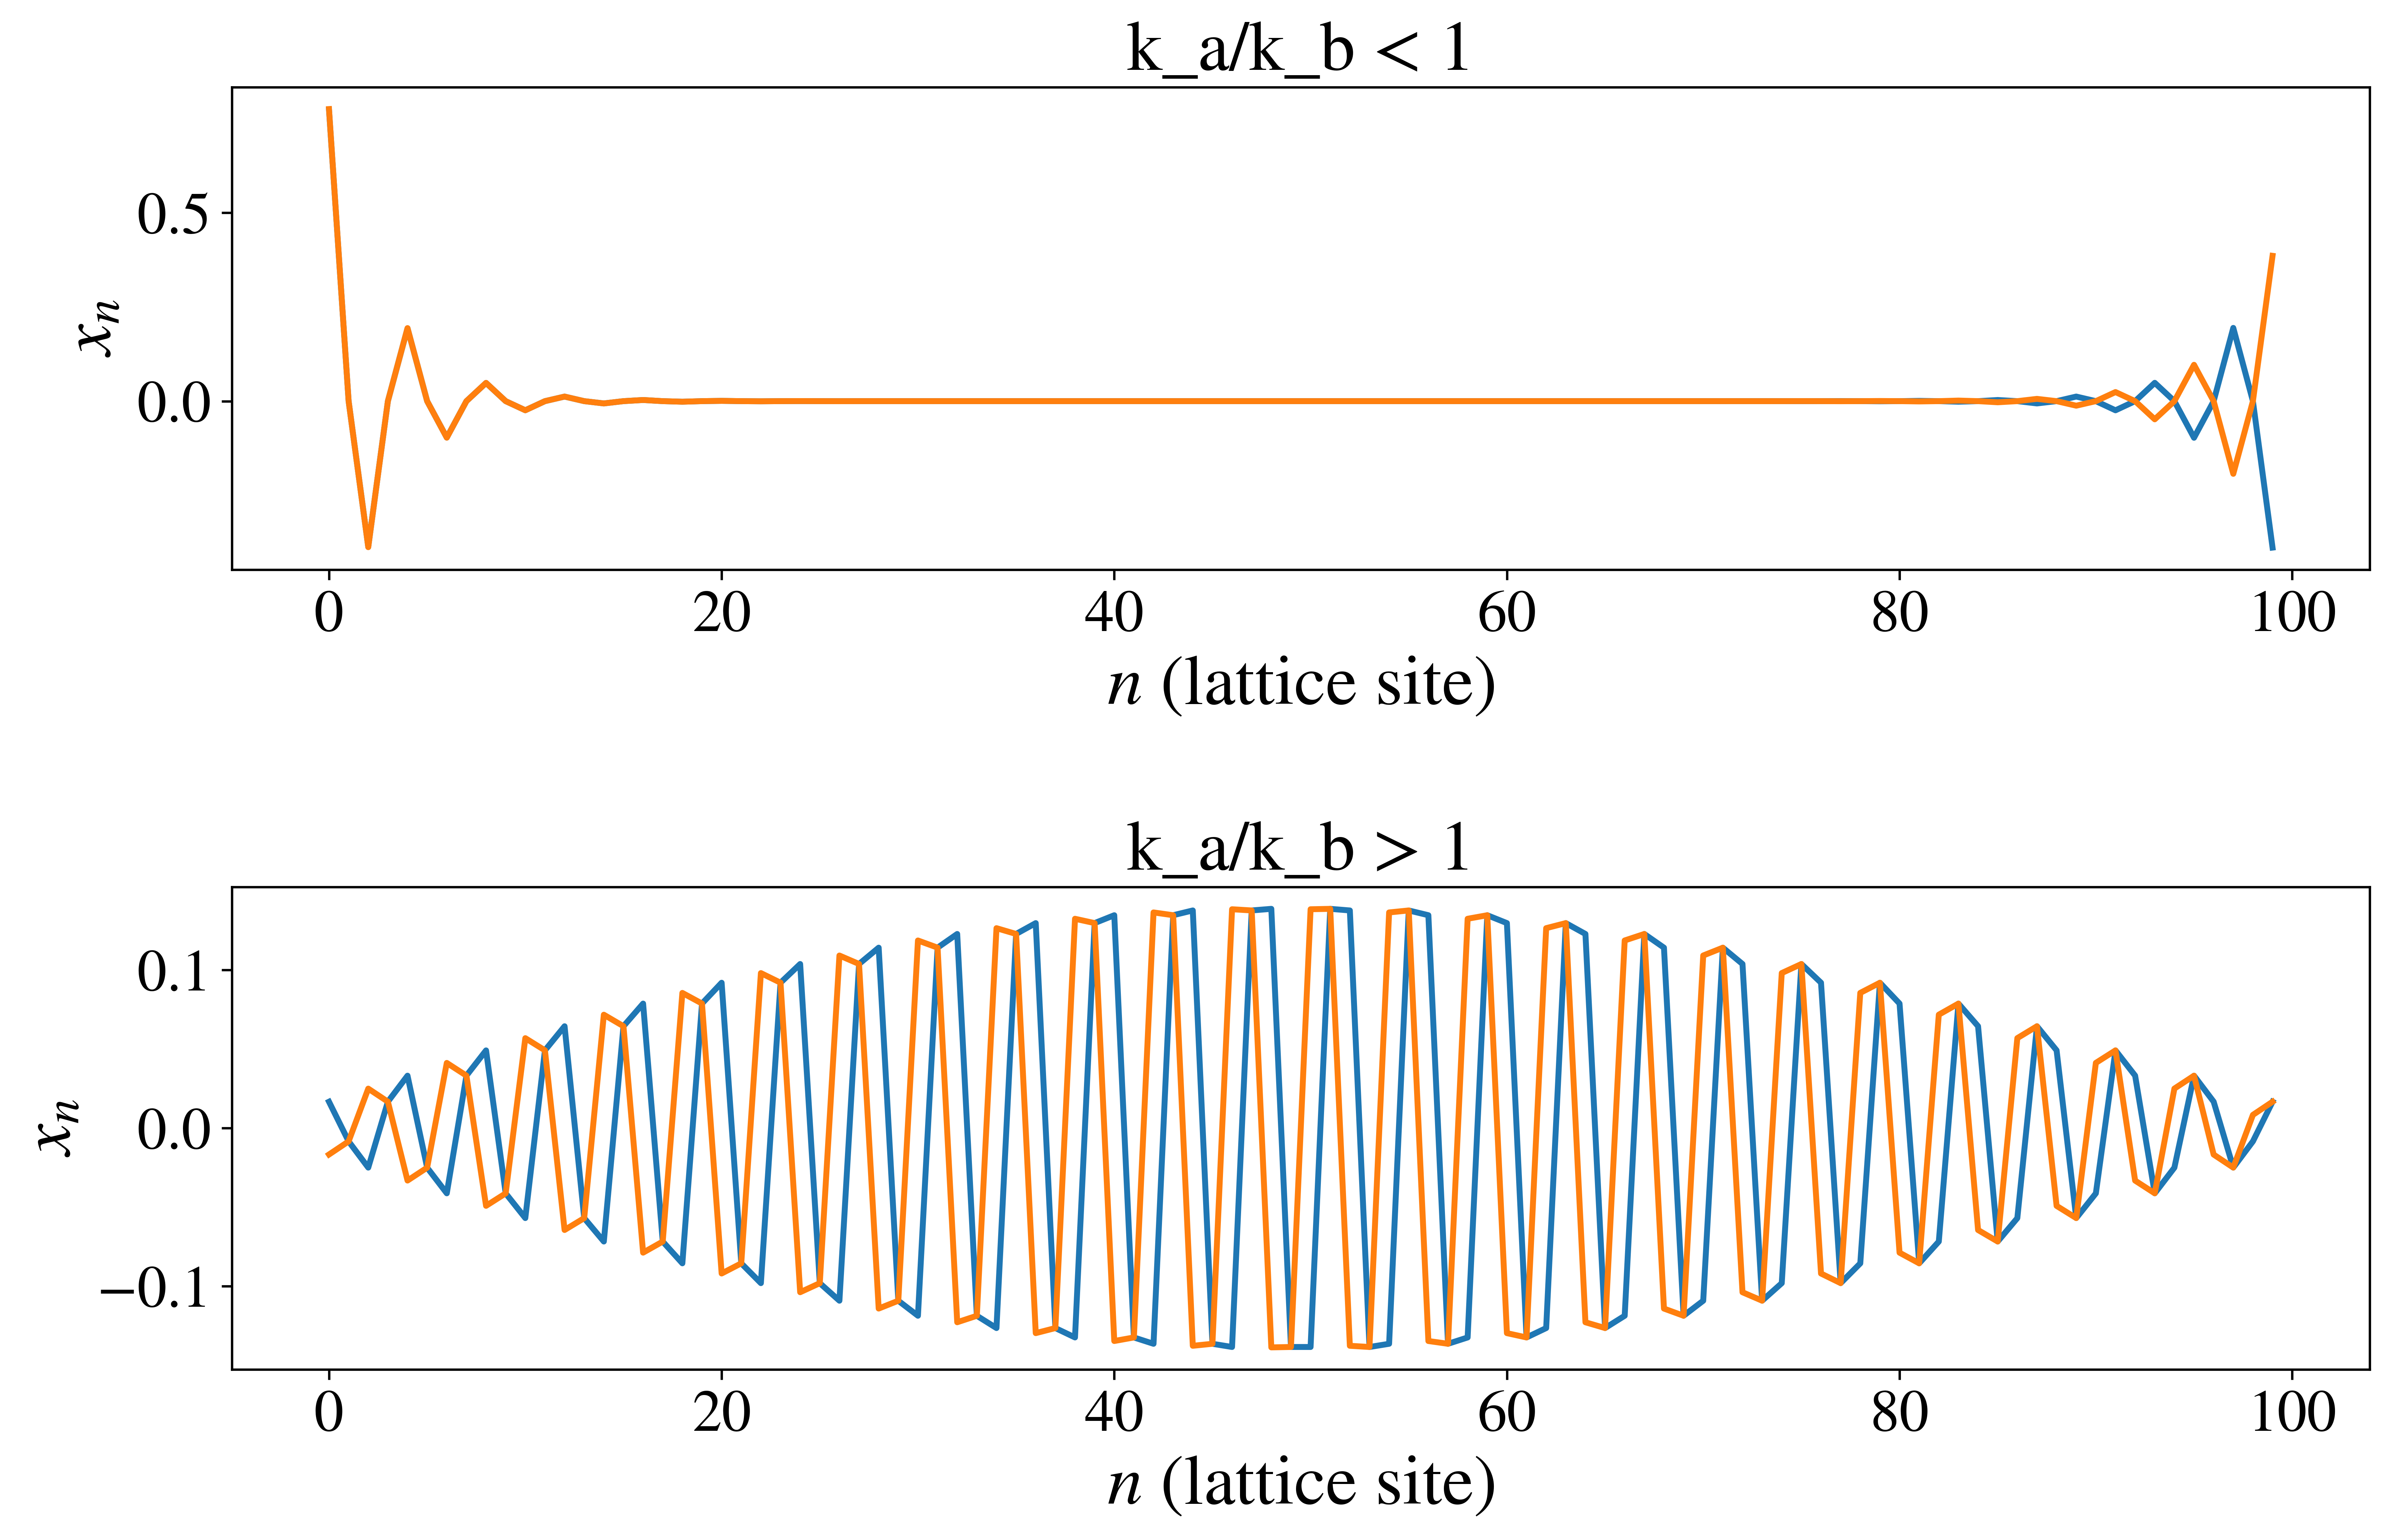

In [8]:
plt.subplot(211)
plt.plot(w1_evecs[:,50])
plt.plot(w1_evecs[:,49])
plt.xlabel(r"$n$ (lattice site)")
plt.ylabel(r"$x_n$")
plt.title("k_a/k_b < 1")

plt.subplot(212)
plt.plot(w0_evecs[:,50])
plt.plot(w0_evecs[:,49])
plt.xlabel(r"$n$ (lattice site)")
plt.ylabel(r"$x_n$")
plt.title("k_a/k_b > 1")

plt.tight_layout()

Clearly, for the top case, the modes are localized to the edges, one even and one odd about the center of the chain. For the bottom case there is no localization.

The labels `w0` and `w1` are not coincidental, as we will see below.

## Tight binding model

The unit cell of this chain consists of an $A$ site with spring constant $k_a$ to the left of a mass and a $B$ site with spring constant $k_b$ to the left of a mass. If we assume that the displacements $x_{A, B}$ are small, then we can use the unit cells as points in an infinite lattice with lattice constant $l$ corresponding to the difference between two $A$ sites.

If we Fourier transform over the lattice sites, such that we consider only wavelengths $k < k_{ny}$ where the Nyquist wavelength is $k_{ny} = \pi/l$, then we can write the displacements as 

$$
\mathbf{x} = \begin{bmatrix}
x_A\\
x_B\\
\end{bmatrix}
 = 
\begin{bmatrix}
\hat{x}_A e^{i k x}\\
\hat{x}_B e^{i k x}\\
\end{bmatrix}
$$

where the amplitudes $\hat{x}_{A,B}$ are the perturbation amplitudes for the $A$ and $B$ sites, respectively. This has the advantage of ensuring the Brillouin zone is periodic.

On inserting this into the governing equations, we arrive at 

$$
\omega^2 \mathbf{x} = k_0 \mathbf{I}_2 \mathbf{x}- 
\begin{bmatrix}
0 & k_B + k_A e^{-ik}\\
k_B + k_A e^{ik} & 0\\
\end{bmatrix}
\mathbf{x},
$$
where $\mathbf{I}_2$ is the $2x2$ identity matrix.
This is exactly the SSH tight binding model with an on-site energy $k_0 = k_A + k_B$.

The eigenvalues of this matrix are given by 

$$
\omega^2 = k_0 \pm \sqrt{k_a^2 + k_b^2 + 2 k_a k_b \cos{k}}
$$

Because the SSH matrix is a unitary $2x2$ matrix, we can write it in terms of the Pauli matrices $\pmb{\sigma}_{0-3}$, 

$$
\begin{bmatrix}
0 & k_B + k_A e^{-ik}\\
k_B + k_A e^{ik} & 0\\
\end{bmatrix}
=
k_0 \pmb{\sigma}_0 + d_x \pmb{\sigma}_1 + d_y \pmb{\sigma}_2 + d_z \pmb{\sigma}_3.
$$

Expanding $k_A e^{\pm i k} = k_a (\cos{k} \pm i \sin{k})$, we have $d_0 = k_0$, $d_x = k_b + k_a \cos{k}$, $d_y = k_b + k_a \sin{k}$, and $d_z = 0$. If we plot the $d_x, d_y$ plane, we can define the winding number $w$ as the number of times the curve encircles the origin. Because $d_x$ and $d_y$ trace out circles in this system, the only possible values are $w=0$ (the circle does not include the origin, $w$ undefined (the circle touches the origin), and $w=1$ (the circle includes the origin). These three options are parameterized by $k$, the wavenumber of the lattice perturbation.

With $k_a > k_b$,  we have a topologically trivial system with winding number $w=0$. When $k_b > k_a$, the winding number is $w=1$, so at $k_a = k_b$, the system undergoes a topological phase change. 

In [9]:
def ssh_evals(k, ka=1, kb=1):
    k0 = ka+kb
    om = np.sqrt(ka**2 + kb**2 + 2*ka*kb*np.cos(k))
    omega_p = k0 + om
    omega_m = k0 - om
    
    return omega_p, omega_m

In [10]:
nk = 100
ka = 1
kb = 0.5

k = np.linspace(-np.pi,np.pi, nk)


omp_w0, omm_w0 = ssh_evals(k, ka=1, kb=0.5)
omp_w1, omm_w1 = ssh_evals(k, ka=0.5, kb=1)
omp_wt, omm_wt = ssh_evals(k, ka=0.75, kb=0.75)

Plotting the eigenvalues for these three cases, we see that the topological transition occurs when then winding number discontinuously changes from zero to one. Correspondingly, the band gap closes and reopens across this transition.

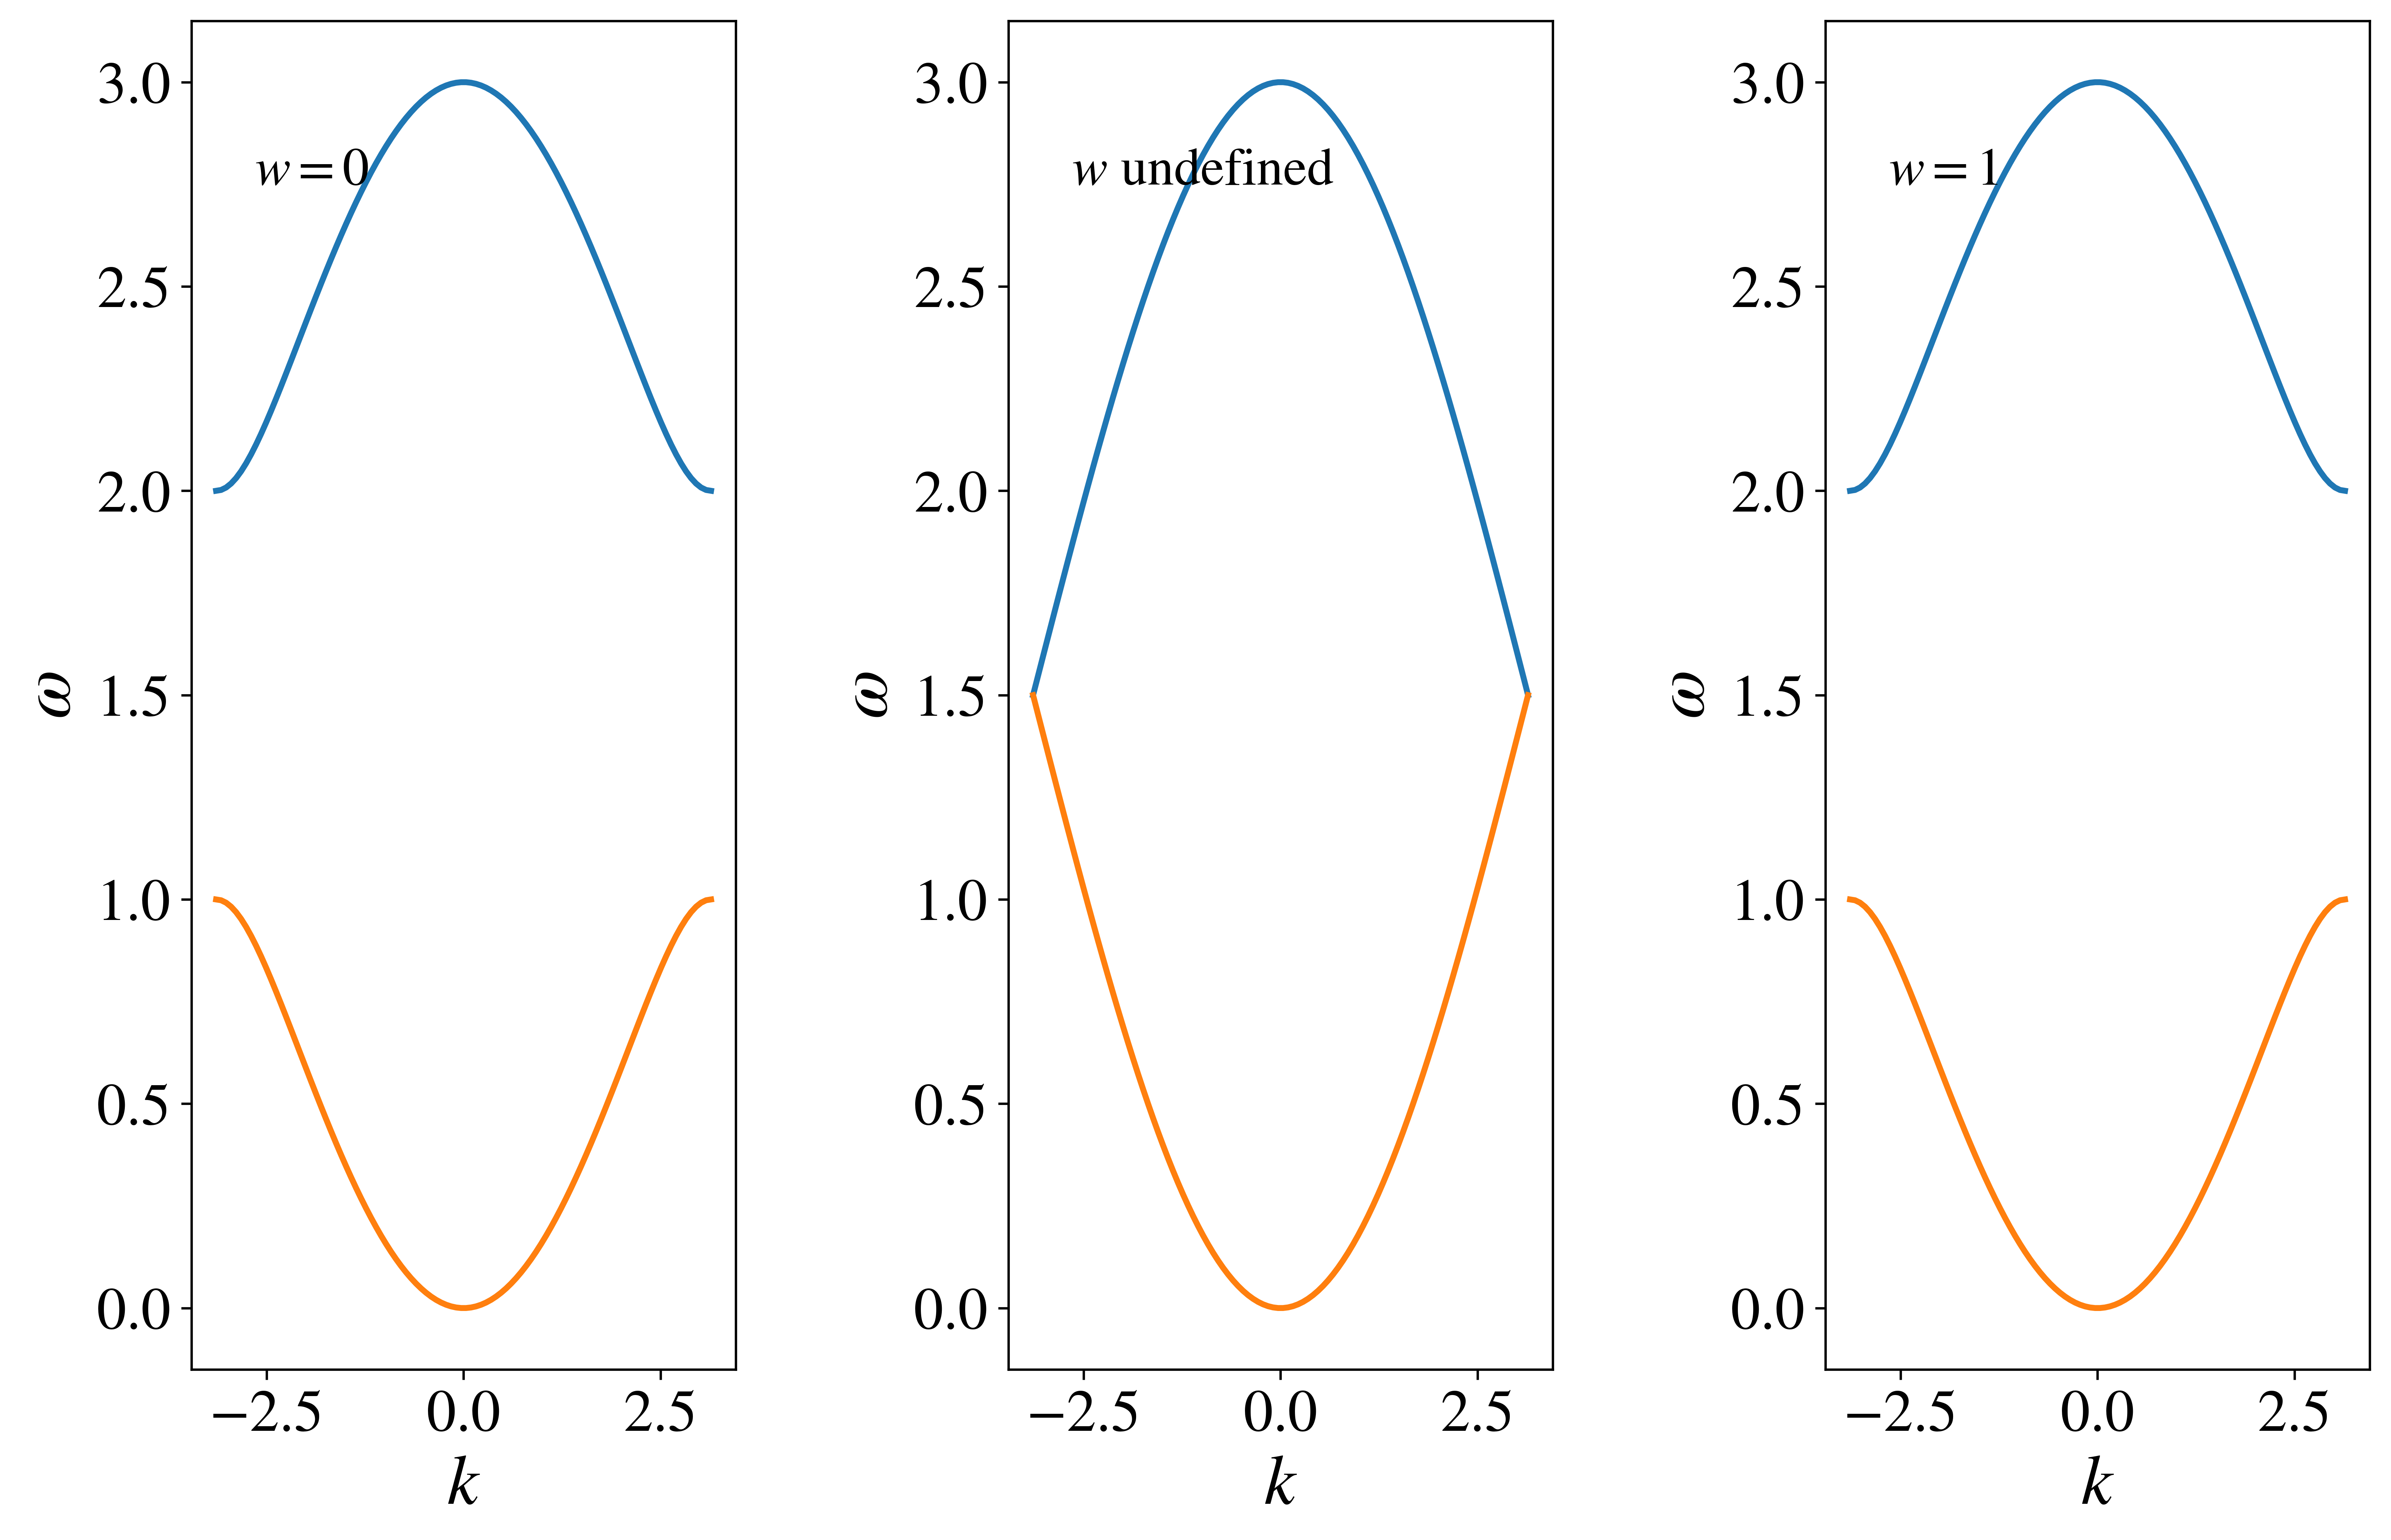

In [11]:
plt.subplot(131)
plt.plot(k, omp_w0)
plt.plot(k, omm_w0)
plt.xlabel(r"$k$")
plt.ylabel(r"$\omega$")
plt.text(-2.65,2.75, r"$w = 0$", fontsize=18)


plt.subplot(132)
plt.plot(k, omp_wt)
plt.plot(k, omm_wt)
plt.xlabel(r"$k$")
plt.ylabel(r"$\omega$")
plt.text(-2.65,2.75, r"$w$ undefined", fontsize=18)


plt.subplot(133)
plt.plot(k, omp_w1)
plt.plot(k, omm_w1)
plt.xlabel(r"$k$")
plt.ylabel(r"$\omega$")
plt.text(-2.65,2.75, r"$w = 1$", fontsize=18)
plt.tight_layout()